# Discussion 4: Visualizing Bigfoot

Many of you have probably heard of Bigfoot before. It's a mysterious ape-like creature that is said to live in North American forests. Most doubt it's existence, but a passionate few swear that bigfoot is real. In this discussion, you will be working with a dataset on bigfoot sightings, visualizing variable distributions and combinations thereof to better understand how/when/where bigfoot is reportedly spotted, and possibly either confirm or cast doubt on its existence.

In [2]:
# load up packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading up bigfoot data
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-09-13/bigfoot.csv'
df = pd.read_csv(url)

In [41]:
df.columns

Index(['observed', 'location_details', 'county', 'state', 'season', 'title',
       'latitude', 'longitude', 'date', 'number', 'classification', 'geohash',
       'temperature_high', 'temperature_mid', 'temperature_low', 'dew_point',
       'humidity', 'cloud_cover', 'moon_phase', 'precip_intensity',
       'precip_probability', 'precip_type', 'pressure', 'summary', 'uv_index',
       'visibility', 'wind_bearing', 'wind_speed'],
      dtype='object')

The bigfoot data contains a ton of variables about each reported bigfoot spotting, including location information, weather, and moon phase. The `observed` variable is pretty interesting, since it contains paragraphs of stories recounting how bigfoot was spotted for each report. Here's one:

In [ ]:
df['observed'][4]

This dataset is extremely messy, with observations missing many values across multiple columns. This is normally the case with data based on citizen reports (many do not fill out all required fields). For the purposes of this discussion, we will drop all observations with any missing values, but note this is horrible practice and you should almost never do this in real life!

In [5]:
bigfoot = df.dropna()

## Part I: Guided Visualizations

In this part, you will be asked to complete a series of relatively small visualization tasks. For each task, you will first be prompted with some piece of information your visualization is to convey, and you and your group members must:

1. decide on which visualization is most appropriate, and 
2. write code to actually make the visualization. 

*Feel free to play around with `seaborn` or `matplotlib` plot decorations, but don't worry too much about this yet. In Part II, you'll have the opportunity to visualize something of your own choosing, and encouraged to use plotting features to make it as informative/pretty as possible.*

### Task 1

Let's first look at distributions of individual quantitative variables (or, their *marginal* distributions). Let's say we're interested in `wind_speed`, `precip_intensity`, and `moon_phase`. For each variable, produce a visualization that depicts that variable's marginal distribution.

*Solution: a histogram or a KDE are probably the best bets for this question. You should be careful though with KDE: all of these variables are bounded in some way and KDE will show positive density for values that are impossible to observe (like negative windspeed)*

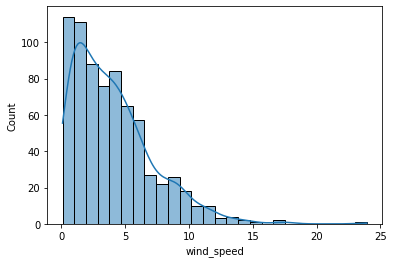

In [10]:
# insert code here
sns.histplot(data = bigfoot, x = 'wind_speed', kde = True);

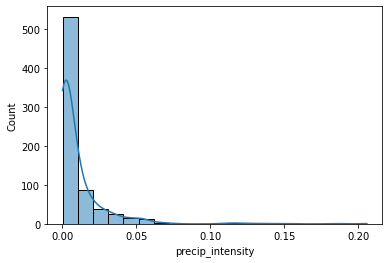

In [7]:
sns.histplot(data = bigfoot, x = 'precip_intensity', bins = 20, kde = True);

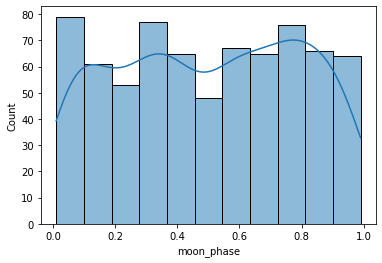

In [8]:
sns.histplot(data = bigfoot, x = 'moon_phase', kde = True);

### Task 2

Now, let's see how these quantitative variables might relate to each other when bigfoot is reportedly out. Choose two variables of the three in Task 1, and produce a visualization that shows what combinations of your two variables are most common when bigfoot is spotted.

*Solution: we choose to plot moon phase vs. precipitation intensity, since even though it appears there is no preferential moon phase for bigfoot sightings, there might be a preferential combination of moon phase and precipitation intensity. The best choice is either a scatterplot with the alpha opacity parameter adjusted, or contour plot to show the density/concentration of points (using a KDE, etc.).*

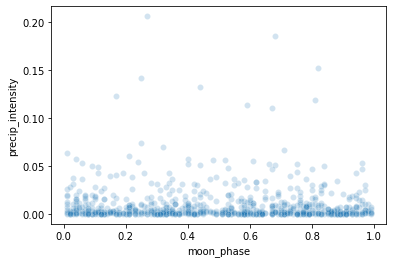

In [11]:
# insert code here

sns.scatterplot(data = bigfoot, x = 'moon_phase', y = 'precip_intensity', alpha = 0.2);

<AxesSubplot:xlabel='moon_phase', ylabel='precip_intensity'>

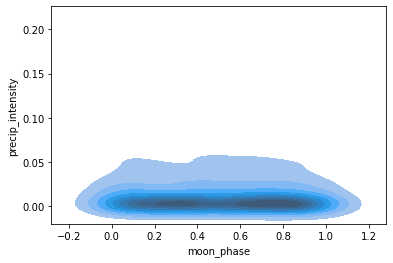

In [15]:
sns.kdeplot(data = bigfoot, x = 'moon_phase', y = 'precip_intensity', shade = True)

### Task 3

Now, let's look at some qualitative variables. Produce a visualization that shows the distribution of bigfoot sightings across the variable `season`.

*Solution: a barplot for each level of the `season` variable is probably the best bet here since we're just looking for counts of observations across categories across categorical variables.*

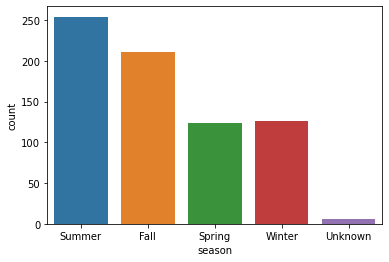

In [13]:
# insert code here

sns.countplot(data = bigfoot, x = 'season');

### Task 4

Return to the two quantitive variables you picked in Task 2. Produce a single visualization that showcases the prevalence of bigfoot sightings at particular combinations of those two variables from Task 2, across each season.

*Solution: if there were less points, an appropriate solution would be to take the scatterplot from Task 2, and assign the points colors depending on what season the observations happened in. However, if we plot it, it looks like information overload (hundreds of points scrunched together with different colors). We can try instead to overlay contour plots from each group, although we still should be careful about how easily the plot can be read. There doesn't seem to be any interesting relationships in our plot, unfortunately :(*

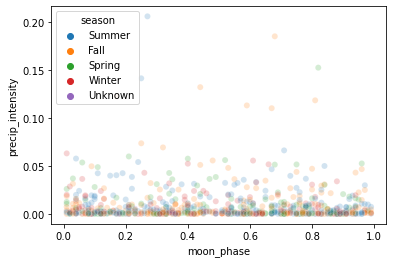

In [14]:
sns.scatterplot(data = bigfoot, 
                x = 'moon_phase', 
                y = 'precip_intensity', 
                hue = 'season', 
                alpha = 0.2);

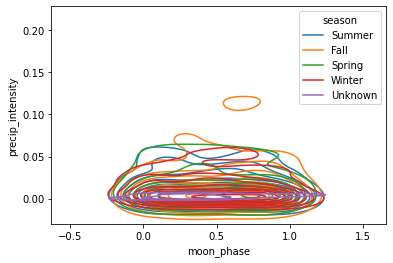

In [22]:
sns.kdeplot(data = bigfoot, 
                x = 'moon_phase', 
                y = 'precip_intensity', 
                hue = 'season', alpha = 1);

## Part II: Your Own Visualizations

Now that you've gotten some more practice making visualizations to convey specific pieces of information, challenge yourselves to produce an interesting visualization that presents information from at least four different variables. If you're stuck with choosing which variables to incorporate, the following are some ideas. You and your group members should decide on how to best visualize all of this information together (think about colors and sizes of objects as ways to convey additional quantitative/qualitative information).

1. Define the temperature swing for some day bigfoot was spotted as the `temperature_low` subtracted from `temperature_high`. Is there a relationship between the temperature swing and moon phase for bigfoot sightings, across the two different `precip_type` ('snow' and 'rain')? 

2. Define a sighting as being in high-humidity conditions if the humidity exceeds 80%. Try to visualize the relationship between whether or not an observation occurred in high humidity conditions, the degree of cloud cover, the high temperature, and the moon phase (*think about how the color and sizes of points can be used top convey extra information*).

3. We didn't see any preferential moon phase for bigfoot sightings, but maybe there is a preferential moon phase in certain parts of the country. Present a visualization of the locations of each bigfoot sighting (using latitude and longitude), the moon phase, and whether or not the report contains the word 'camp' (to indicate that bigfoot was spotted while the individuals were camping). For an extra challenge, try to use `plotly` to make an interactive map showing these variables (see the following link for reference: https://plotly.com/python/scatter-plots-on-maps/)


*If you have time, challenge yourself to also make your plot as visually appealing as possible! Play around with color, axis labels, legends, and see what you can do!*

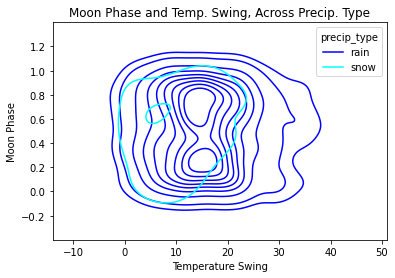

In [75]:
# Problem 1 Example Solution

bigfoot['temperature_swing'] = bigfoot['temperature_high'] - bigfoot['temperature_low']
ax = sns.kdeplot(data = bigfoot, 
                x = 'temperature_swing', 
                y = 'moon_phase', 
                hue = 'precip_type', 
                palette = ['blue', 'cyan']);
ax.set_xlabel('Temperature Swing');
ax.set_ylabel('Moon Phase');
ax.set_title('Moon Phase and Temp. Swing, Across Precip. Type');

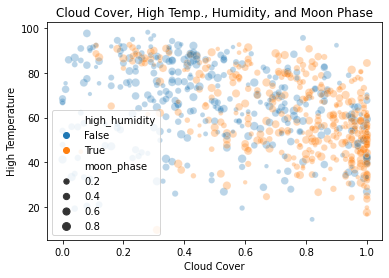

In [25]:
# Problem 2 Example Solution
# definitely a bit of overplotting though

bigfoot['high_humidity'] = bigfoot['humidity'] > .8
sns.scatterplot(data = bigfoot, 
                x = 'cloud_cover', 
                y = 'temperature_high', 
                hue = 'high_humidity', 
                size = 'moon_phase', alpha = 0.3);
plt.xlabel('Cloud Cover');
plt.ylabel('High Temperature');
plt.title('Cloud Cover, High Temp., Humidity, and Moon Phase');
plt.legend(title = '', loc = 'lower left');

In [51]:
# Problem 3 Example Solution

bigfoot['activities'] = bigfoot['observed'].str.contains('camp')

import plotly.express as px
fig = px.scatter_geo(bigfoot, 
                     lat="latitude", 
                     lon="longitude", size="moon_phase", color = "activities");
fig.show()